# Lab02: Working with Time Series


## 1. Thu thập dữ liệu

- **Ngữ cảnh để nhóm chúng em tìm kiếm dữ liệu này**: Chúng em chọn bộ dữ liệu về giá xăng dầu ở Ý để có thể hiểu hơn về cách thức giá xăng dầu ảnh hưởng đến nền kinh tế và cuộc sống của người dân tại quốc gia này. Bên cạnh đó, bộ dữ liệu này cũng cung cấp thông tin quan trọng để các nhà nghiên cứu và chính phủ đưa ra các quyết định về chính sách năng lượng và môi trường.
- **Chủ đề dữ liệu**: Giá xăng dầu hàng tuần ở Ý.
- **Nguồn dữ liệu**: Bộ dữ liệu được lấy từ data.world, một trang web nơi chia sẻ các bộ dữ liệu được cộng đồng đóng góp và chia sẻ. Bộ dữ liệu này được đăng lên bởi @rafabelokurows và được chia sẻ với tất cả mọi người cho mục đích học tập và nghiên cứu. 
- **License của dữ liệu**: IODL 2.0 license.
- **Phương pháp để thu thập dữ liệu này**: được trích xuất từ trang web của chính phủ Ý (dgsaie.mise.gov.it).


## 2. Tiền xử lý dữ liệu

#### Import thư viện

In [3]:
# Thư viện xử lý dữ liệu
import pandas as pd
import numpy as np

# Thư viện trực quan hóa
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Thư viện cho mô hình học máy
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# Thư viện trực quan hóa
import ipywidgets as widgets
from ipywidgets import*
from IPython.display import display

from plotly.subplots import make_subplots
from plotly.offline import iplot
from ipyvizzu import Chart, Data, Config, Style

import plotly.figure_factory as ff

#### Đọc dữ liệu từ file CSV

In [4]:
df = pd.read_csv("./../datasets/weekly_fuel_prices_all_data_from_2005_to_20221102.csv",sep=";")

#### In 5 dòng dữ liệu đầu tiên

In [3]:
df.head()

,SURVEY_DATE,PRODUCT_ID,PRODUCT_NAME,PRICE,VAT,EXCISE,NET,CHANGE
0,2005-01-03,1,Euro-Super 95,1115.75,185.96,558.64,371.15,-1.57
1,2005-01-03,2,Automotive gas oil,1018.28,169.71,403.21,445.36,-0.33
2,2005-01-03,3,Heating gas oil,948.50,158.08,403.21,387.21,-22.55
3,2005-01-03,5,LPG,552.50,92.08,156.62,303.80,0.22
4,2005-01-03,6,Residual fuel oil,553.25,50.30,166.84,336.11,-12.21


#### Thông tin số dòng và số cột

In [4]:
df.shape

(5358, 8)

 -> Bộ dữ liệu có 5358 dòng và 8 cột

### 2.1. Mỗi dòng có ý nghĩa gì? ? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng dữ liệu cho biết thông tin xăng dầu theo ngày của mỗi loại xăng ở Ý.

Tất cả các dòng dữ liệu có ý nghĩa hoàn toàn giống nhau và không có ngoại lệ. 

### 2.2. Mỗi cột có ý nghĩa gì?


In [5]:
df.columns

Index(['SURVEY_DATE', 'PRODUCT_ID', 'PRODUCT_NAME', 'PRICE', 'VAT', 'EXCISE',
       'NET', 'CHANGE'],
      dtype='object')

- Cột `SURVEY_DATE` là ngày thực hiện khảo sát
- Cột `PRODUCT_ID` là mã số của từng loại xăng dầu 
- Cột `PRODUCT_NAME` là tên của loại xăng dầu
- Cột `PRICE` là giá xăng dầu
- Cột `VAT` là thuế giá trị gia tăng VAT
- Cột `EXCISE`là thuế tiêu thụ đặc biệt Excise
- Cột `NET` là giá trị thực tế của xáng dầu sau khi loại bỏ các khoản thuế.
- Cột `CHANGE` là khoảng thay đổi của giá xăng dầu

### 2.3. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?

In [6]:
df.dtypes

SURVEY_DATE      object
PRODUCT_ID        int64
PRODUCT_NAME     object
PRICE           float64
VAT             float64
EXCISE          float64
NET             float64
CHANGE          float64
dtype: object

- Dữ liệu ở các cột `SURVEY_DATE`, `PRODUCT_NAME` thuộc kiểu non-numeric
- Dữ liệu ở các cột `PRODUCT_ID` thuộc kiểu số nguyên
- Dữ liệu ở các cột `PRICE`, `VAT`, `EXCISE`, `NET`, `CHANGE` thuộc kiểu số thực

Cột `SURVEY_DATE` sẽ được xử lý tiếp để chuyển từ kiểu dữ liệu object sang datetime

### 2.4. Với mỗi cột, các giá trị (dạng số, dạng phân loại) được phân bố như thế nào?

#### Phân bố của dữ liệu ở cột `PRICE`

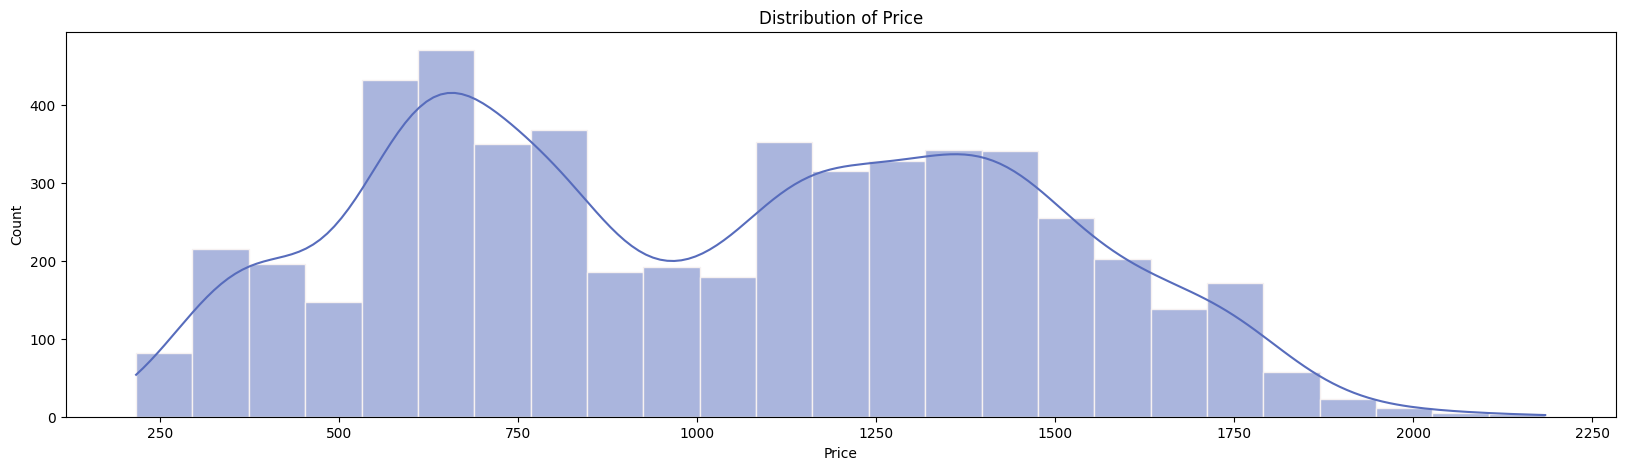

In [9]:
plt.figure(figsize=(20, 5))
sns.histplot(df['PRICE'],color="#576CBC",edgecolor="#F6F1F1",kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.show()

#### Phân bố của dữ liệu ở cột `VAT`

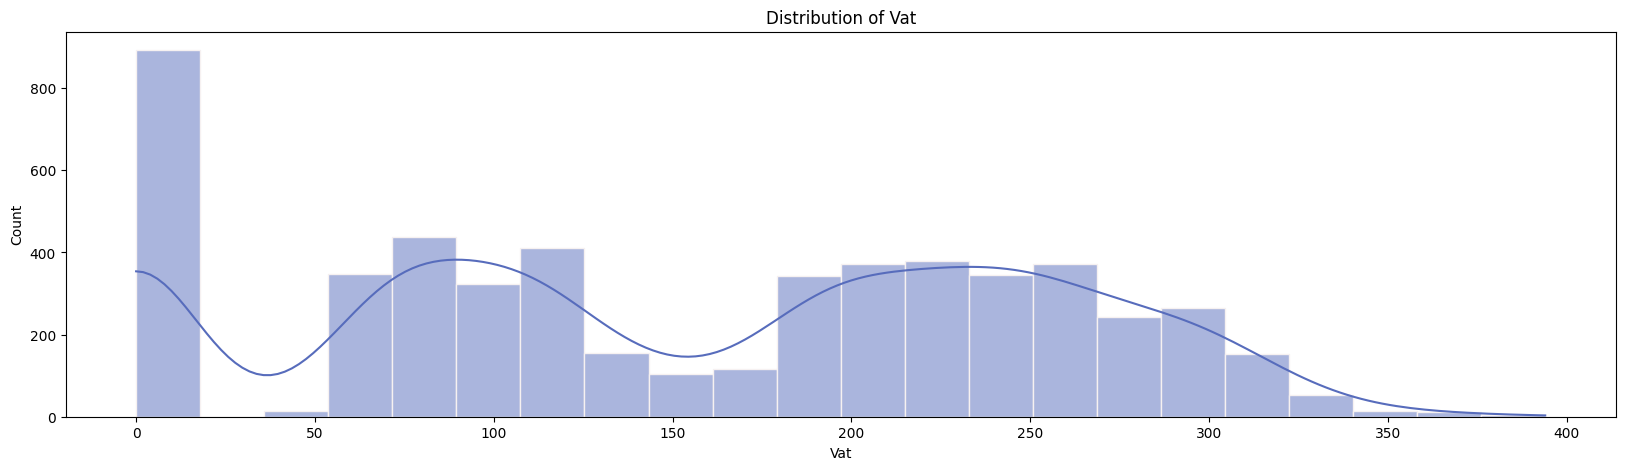

In [10]:
plt.figure(figsize=(20, 5))
sns.histplot(df['VAT'],kde=True,color="#576CBC",edgecolor="#F6F1F1")
plt.title('Distribution of Vat')
plt.xlabel('Vat')
plt.show()

#### Phân bố của dữ liệu ở cột `EXCISE`

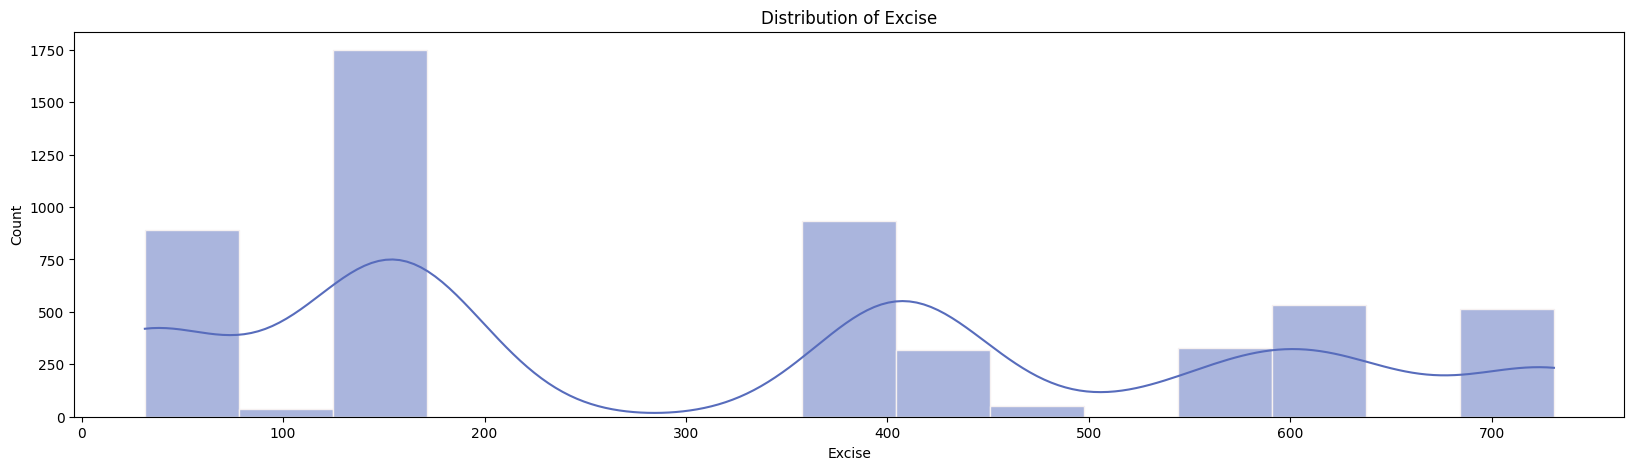

In [11]:
plt.figure(figsize=(20, 5))
sns.histplot(df['EXCISE'],kde=True,color="#576CBC",edgecolor="#F6F1F1")
plt.title('Distribution of Excise')
plt.xlabel('Excise')
plt.show()

#### Phân bố của dữ liệu ở cột `NET`

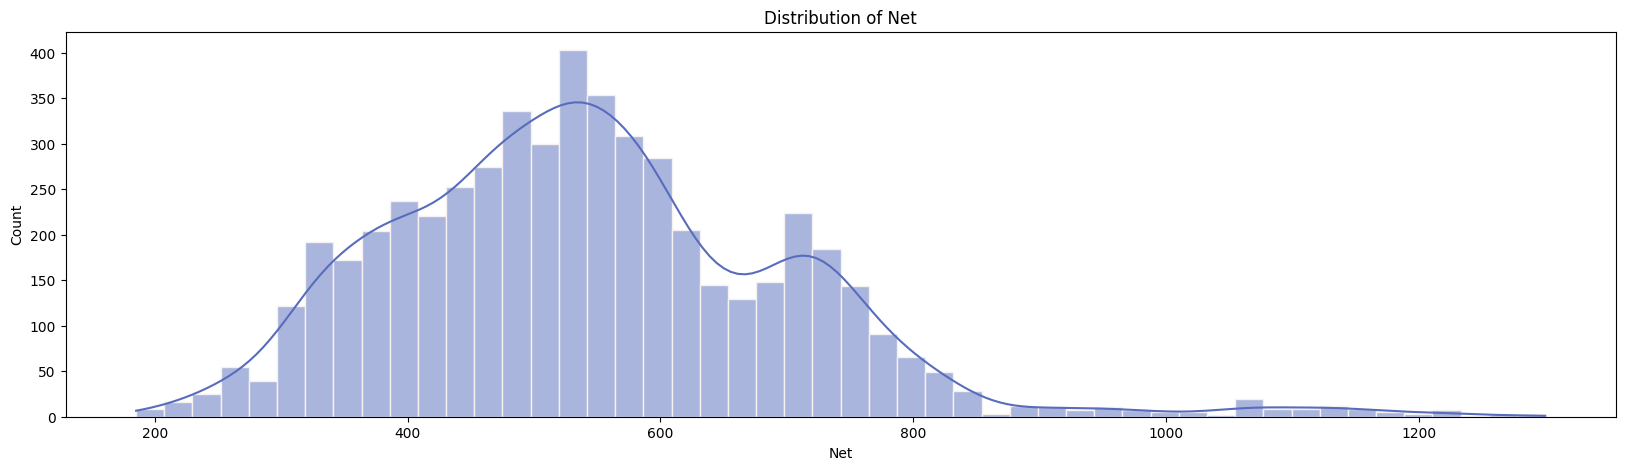

In [12]:
plt.figure(figsize=(20, 5))
sns.histplot(df['NET'],kde=True,color="#576CBC",edgecolor="#F6F1F1")
plt.title('Distribution of Net')
plt.xlabel('Net')
plt.show()

#### Phân bố của dữ liệu ở cột `CHANGE`

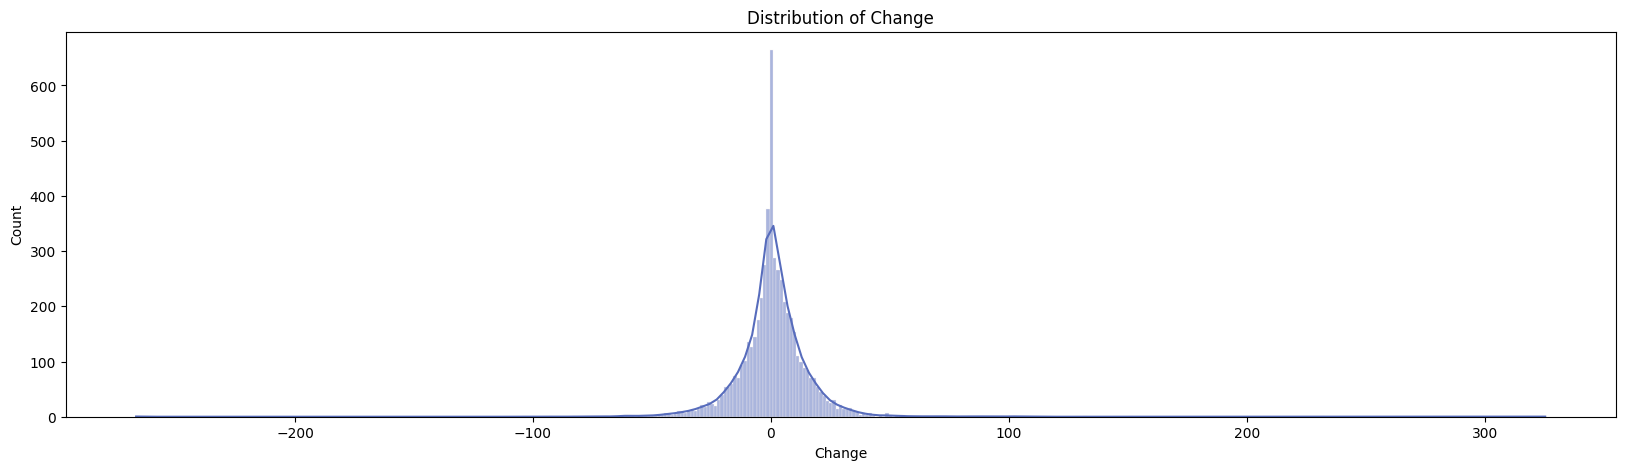

In [13]:
plt.figure(figsize=(20, 5))
sns.histplot(df['CHANGE'],kde=True,color="#576CBC",edgecolor="#F6F1F1")
plt.title('Distribution of Change')
plt.xlabel('Change')
plt.show()

#### Phân bố của dữ liệu ở cột `PRODUCE_NAME`

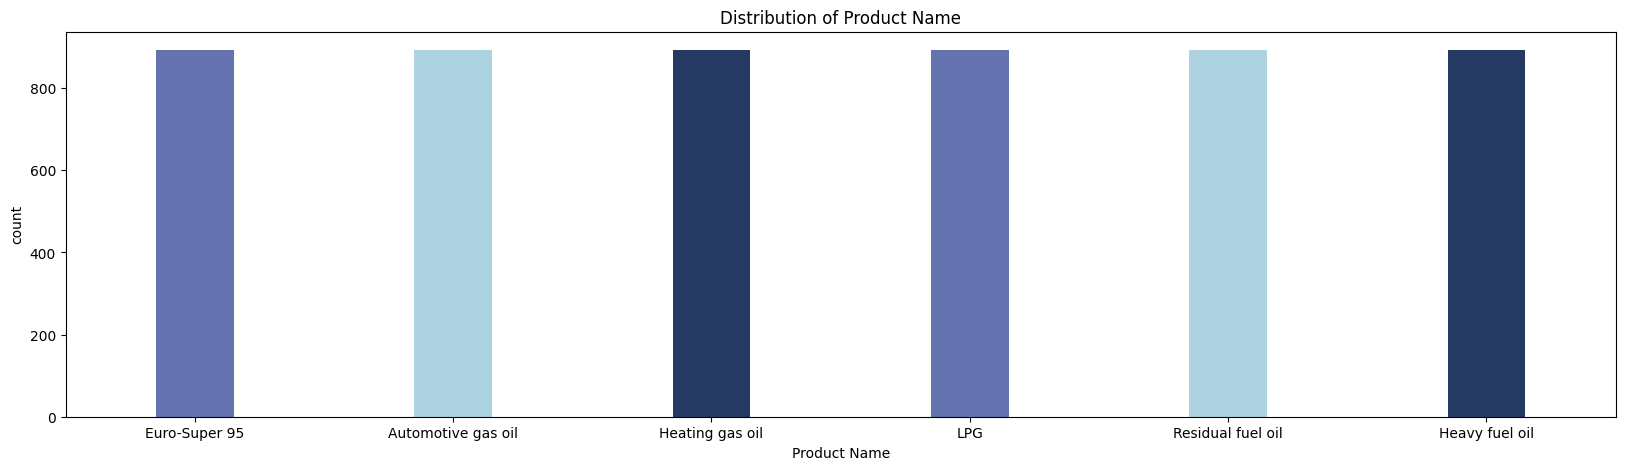

In [14]:
plt.figure(figsize=(20, 5))
sns.countplot(data=df,x='PRODUCT_NAME', width=0.3,palette=["#576CBC","#A5D7E8","#19376D"])
plt.title('Distribution of Product Name')
plt.xlabel('Product Name')
plt.show()

### 2.5. Có cần phải tiền xử lý dữ liệu hay không và nếu có thì nhóm sinh viên cần phải xử lý như thế nào?

**Kiểm tra các dòng trùng lặp**

In [15]:
df.duplicated().sum()

0

-> Không có dòng dữ liệu nào bị lặp lại

**Kiểm tra các cột bị mất dữ liệu**

In [18]:
# find missing values
df.isnull().sum()

SURVEY_DATE     0
PRODUCT_ID      0
PRODUCT_NAME    0
PRICE           0
VAT             0
EXCISE          0
NET             0
CHANGE          0
dtype: int64

Không có cột nào bị mất dữ liệu

**Chuyển cột `SURVEY_DATE` sang kiểu datetime**

In [17]:
# convert survey date column to datetime
df['SURVEY_DATE'] = pd.to_datetime(df['SURVEY_DATE'])

Kiểm tra lại dữ liệu

In [20]:
df.dtypes

SURVEY_DATE     datetime64[ns]
PRODUCT_ID               int64
PRODUCT_NAME            object
PRICE                  float64
VAT                    float64
EXCISE                 float64
NET                    float64
CHANGE                 float64
dtype: object

**Kiểm tra các khảo sát trong tuần**

Kiểm tra xem có tuần nào không thực hiện khảo sát hay khảo sát thiếu hoặc thừa dữ liệu.

In [22]:
# Sắp xếp lại DataFrame theo cột ngày
df.sort_values(by='SURVEY_DATE', inplace=True)

# Lặp lại từng tuần và kiểm tra xem có khảo sát đủ 6 loại xăng dầu mỗi tuần không
count = 0
count_missing = 0
count_less = 0
count_more = 0
missing_weeks = []
less_weeks=[]
more_weeks=[]
for i, week in df.groupby(pd.Grouper(key='SURVEY_DATE', freq='W')):
    if len(week) == 0:# Kiểm tra có khảo sát được thực hiện trong tuần không?
        count_missing +=1
        missing_weeks.append(i)
    elif len(week) < 6:# Kiểm tra loại xăng dầu được khảo sát có đủ 6 loại không
        count_less+=1
        less_weeks.append(i)
    elif len(week) > 6:# Kiểm tra loại xăng dầu được khảo sát mỗi tuần có bị lặp lại không
        count_more+=1
        more_weeks.append(week)
    else:
        count+=1

print('Số tuần thực hiện khảo sát: ',count)
print('Số tuần không thực hiện khảo sát: ',count_missing)
print('Số tuần thực hiện khảo sát thiếu: ',count_less)
print('Số tuần thực hiện khảo sát thừa: ',count_more)

Số tuần thực hiện khảo sát:  931
Số tuần không thực hiện khảo sát:  0
Số tuần thực hiện khảo sát thiếu:  0
Số tuần thực hiện khảo sát thừa:  0


Xử lí các tuần không thực hiện khảo sát

In [19]:
for i in missing_weeks:
    # Nếu tuần không thực hiện khảo sát thì sẽ lấy trung bình cộng của tuần liền trước và sau để lấp vào dữ liệu khuyết
    # Tính giá trung bình của từng loại xăng dầu cho 2 tuần liền trước và liền sau
    prev_week = df[df['SURVEY_DATE'] < i].tail(6)
    next_week = df[df['SURVEY_DATE'] > i].head(6)
    avg_price = pd.concat([prev_week, next_week]).groupby(['PRODUCT_ID','PRODUCT_NAME'])[['PRICE','VAT','EXCISE','NET','CHANGE']].mean().reset_index()
    avg_price.insert(loc=0, column='SURVEY_DATE', value=i)
    # Thêm vào dataframe ban đầu
    df = pd.concat([df, avg_price])

Xử lí các tuần thực hiện khảo sát thừa

In [20]:
week = more_weeks[0]
print(week)

    SURVEY_DATE  PRODUCT_ID        PRODUCT_NAME    PRICE     VAT  EXCISE   
390  2006-05-01           1       Euro-Super 95  1342.06  223.68  564.00  \
391  2006-05-01           2  Automotive gas oil  1210.84  201.81  413.00   
392  2006-05-01           3     Heating gas oil  1150.10  191.68  403.21   
393  2006-05-01           5                 LPG   651.59  108.60  156.62   
394  2006-05-01           6   Residual fuel oil   706.94   64.27  166.84   
395  2006-05-01           8      Heavy fuel oil   365.64    0.00   31.39   
397  2006-05-02           2  Automotive gas oil  1210.84  201.81  413.00   
398  2006-05-02           3     Heating gas oil  1150.10  191.68  403.21   
396  2006-05-02           1       Euro-Super 95  1342.06  223.68  564.00   
400  2006-05-02           6   Residual fuel oil   706.94   64.27  166.84   
401  2006-05-02           8      Heavy fuel oil   365.64    0.00   31.39   
399  2006-05-02           5                 LPG   651.59  108.60  156.62   

        NET

-> Nhận thấy trong tuần này, đã có hai khảo sát được thực hiện và hai cuộc khảo sát này có dữ liệu giống nhau nên ta sẽ xóa đi những dòng dữ liệu bị dư và trùng lặp (là dữ liệu ngày 2006-05-02).

In [21]:
df.drop(df[df['SURVEY_DATE'] == '2006-05-02'].index,inplace=True)

## 3. Khám phá mối quan hệ trong dữ liệu

Chúng ta sẽ khám phá các mối quan hệ trong dữ liệu bằng cách đưa ra những câu hỏi và trả lời.

### 3.1. Đặt câu hỏi

**1. Câu hỏi 1:**
	
**Nội dung câu hỏi:** Giá xăng dầu có sự biến động như thế nào trong khoảng thời gian từ 2005-2022? Hãy thể hiện sự biến động này cả theo năm và theo từng tháng trong năm.

**2. Câu hỏi 2:**

**Nội dung câu hỏi** Thống kê giá trị NET của các loại xăng dầu trong 3 năm gần đây (2020-2022). Cho thấy sự chênh lệch của mỗi loại với giá trị trung bình.

**3. Câu hỏi 3:**

**Nội dung câu hỏi:** Hãy chứng minh cho nhận định rút ra ở câu 2 "giá xăng dầu (Price) còn phải phụ thuộc vào rất nhiều yếu tố khác như: thuế giá trị gia tăng (VAT) và thuế tiêu thụ đặc biệt (excise tax)".

**4. Câu hỏi 4:**

**Nội dung câu hỏi:** Hãy cho thấy sự biến động về giá bán trong thị trường xăng dầu ở Ý với nhiều góc nhìn thời gian khác nhau:
- Toàn bộ khoảng thời gian từ 2005-2022
- Trong vòng 30 ngày trước
- Trong vòng 6 tháng trước
- Trong vòng 1 năm trước

**5. Câu hỏi 5:** Sự thay đổi giá nhiên liệu theo thời gian?

**6. Câu hỏi 6:** Phân phối giá nhiên liệu theo loại sản phẩm?

**7. Câu hỏi 7:** Sự tương quan giữa giá nhiên liệu và tỷ lệ VAT/Excise.

**8. Câu hỏi 8:** Hãy áp dụng mô hình hồi quy tuyến tính để dự đoán cho giá xăng dầu trung bình ở Ý.

**9. Câu hỏi 9:** Hãy áp dụng các mô hình dự đoán khác cho giá xăng dầu trung bình ở Ý.

**10. Câu hỏi 10:** Hãy áp dụng Classification model để phân loại các loại xăng ở Ý.


### 3.2. Trả lời câu hỏi

#### **Câu hỏi 1:**

**Loại biểu đồ sử dụng:** biểu đồ thanh dọc (kết hợp hiệu ứng động), biểu đồ đường.

**Tính phù hợp của biểu đồ với dữ liệu:** 
- Biểu đồ thanh dọc và biểu đồ đường là lựa chọn phù hợp để so sánh số liệu hoặc giá trị theo thời gian.

- Để nhìn thấy được sự biến động giá các loại xăng dầu theo thời gian:
    - Với biểu đồ thanh dọc: sử dụng hiệu ứng trực quan theo từng năm.
    - Với biểu đồ đường: lấy trục x của biểu đồ làm trục thời gian, giá xăng dầu là trục y sẽ biến thiên theo thời gian tương ứng.

**Trực quan hóa:**

***Giá xăng dầu theo năm:*** 

In [21]:
# Xử lý dữ liệu, tạo dữ liệu cần thiết
df1=df.copy()
df1['GET_YEAR']=df1['SURVEY_DATE'].dt.year
df1= df1.groupby(['GET_YEAR','PRODUCT_NAME'])["PRICE"].mean().reset_index()

# Tiến hành trực quan hóa dữ liệu
running_chart = Chart(display = "begin")
running_chart.scroll_into_view = False
data=Data()
data.add_data_frame(df1)
chart = Chart(width="500px", height="300px")
running_chart.animate(data)

config = Config({"channels": {"x": { "set": ["PRODUCT_NAME"], "range": { "min": "-5.9max" } },"y": { "set": ["PRICE"], "range": { "max": 2100} },
                "color": { "set": ["PRODUCT_NAME"] },
            "label": { "set": ["PRICE"] }},
            "sort": 'byValue'})

style= Style({"plot": {"marker": {"label": {"maxFractionDigits": "0"}}, "paddingLeft":"10em", "xAxis": { "title": { "color" : "#475A80" }}}})

for year in range(2005, 2023):
    running_chart.animate(Config({"title": f"Average fuel price {year}"}))
    running_chart.animate(Data.filter(f"parseInt(record.GET_YEAR) == {year}"), 
                          config,style,
                          duration = 2,
                          delay = 0,        
                          x = { "easing": "linear", "delay": 0 },
                          y = { "delay": 0 },
                          show = { "delay": 3 },
                          hide = { "delay": 0 },
                          title = { "duration": 5, "delay": 0 })

***Giá xăng dầu theo từng tháng trong năm:***

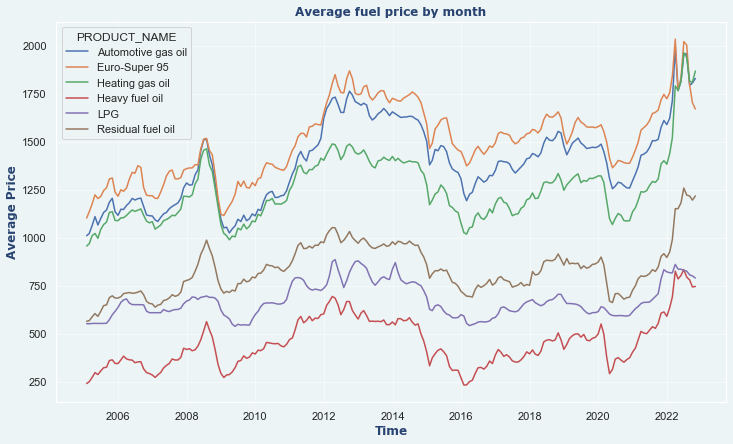

In [22]:
# Xử lý dữ liệu, tạo dữ liệu cần thiết
df2=df.copy()
df2 = df2.set_index('SURVEY_DATE').groupby([pd.Grouper(freq='M'),'PRODUCT_NAME'])[['PRICE']].mean()

# Tiến hành trực quan hóa dữ liệu
sns.set(rc={"axes.facecolor":"#ECF4F5","figure.facecolor":"#ECF4F5"})
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.lineplot(data=df2, x="SURVEY_DATE", y='PRICE', hue='PRODUCT_NAME', ax=ax)
ax.set_ylabel('Average Price', fontweight='bold', color="#284371", family ='Verdana')
ax.set_xlabel('Time', fontweight='bold', color="#284371", family ='Verdana')
ax.set_title('Average fuel price by month', fontweight='bold', loc='center', color="#284371", family ='Verdana')
ax.grid(alpha=0.5)
plt.show()

**Kỹ thuật trực quan sử dụng:**

- Màu sắc: mỗi màu sắc sẽ đại diện cho một loại xăng dầu khác nhau.

=> Điều này giúp người xem dễ dàng phân biệt, đưa ra so sánh giữa các loại xăng dầu một cách nhanh chóng.

**Nhận xét:**

<p><img style="float:right; margin:5px; padding:5px; max-height:200px" src="https://raw.githubusercontent.com/nonameHiHiHi/SavePicture/main/2048237.png"></p>
<p style="text-align:justify;">


Euro-Super 95 luôn là loại xăng có mức giá cao nhất,bởi lẽ nó là loại xăng chất lượng cao, được sản xuất thông qua quy trình công nghệ tiên tiến và cần thiết lọc hoàn chỉnh để đáp ứng các tiêu chuẩn khắt khe của Liên minh châu Âu (EU) về khí thải xe hơi. Được phân phối rộng rãi trên thị trường EU.

Heavy fuel oil luôn có giá rẻ hơn những loại xăng dầu khác, bởi lẽ nó có thành phần hydrocarbon nặng hơn và ít được xử lý hơn để sản xuất, nên nó thường được sử dụng cho các mục đích công nghiệp hoặc tàu biển, thay vì sử dụng trong phương tiện giao thông cá nhân. Ngoài ra, chi phí sản xuất, vận chuyển và lưu trữ heavy fuel oil cũng thấp hơn so với các loại xăng dầu khác.
   
Giá xăng dầu tại Ý có nhiều biến động theo thời gian từ 2005-2022, trong đó có một số cột mốc có sự biến động lớn như:

- Trong giai đoạn 2012-2014, giá xăng dầu tăng mạnh, nguyên nhân là do:
    - Tình trạng thiếu hụt và cạnh tranh về nguồn cung từ các nhà sản xuất dầu mỏ hàng đầu thế giới.
    - Sự biến động của tỷ giá tiền tệ, đặc biệt là khoảng thời gian khi euro giảm giá đối với USD.
    - Tăng thuế và phí liên quan đến điều chỉnh giá xăng dầu của chính phủ Ý.
    - Không ổn định trong sản xuất năng lượng tái tạo như điện mặt trời và gió, khiến cho người tiêu dùng phải phụ thuộc vào nguồn năng lượng từ dầu mỏ và khí đốt.
- Trong năm 2020, giá xăng dầu giảm mạnh, nguyên nhân là do:
    - Sự tràn đầy của nguồn cung dầu mỏ toàn cầu trong hoàn cảnh giảm nhu cầu do ảnh hưởng của đại dịch COVID-19, khiến cho giá xăng dầu trên thế giới giảm sút.
    - Sự gia tăng sản xuất dầu mỏ từ các quốc gia OPEC+, đặc biệt là một số thành viên mới như Nga và Kazakhstan, đã đẩy giá xăng dầu trở lại mức thấp.
</p>


#### **Câu hỏi 2:**

**Loại biểu đồ sử dụng:** biểu đồ thanh ngang.

In [23]:
# Xử lý dữ liệu, tạo dữ liệu cần thiết
df3=df.copy()
df3['GET_YEAR']=df3['SURVEY_DATE'].dt.year
df3 = df3.loc[(df3['GET_YEAR'] >= 2020)]
temp = df3.groupby(['PRODUCT_NAME'])['NET'].agg('mean').astype(int).sort_values()
year_values = df3.groupby(['PRODUCT_NAME','GET_YEAR'])['NET'].agg('mean').unstack().astype(int).reset_index()

# Tiến hành trực quan hóa dữ liệu
layout = go.Layout(
                    paper_bgcolor= '#f5f5f6',
                    plot_bgcolor='rgba(0,0,0,0)',
                    margin = dict( t = 100, b = 50, r = 70, l = 75),
                    width = 1000, height = 600,
                    font = dict(
                                family = "Franklin Gothic",
                                size = 10,
                                color= '#101010',
                    ),
                    titlefont = dict(
                                family =  "Franklin Gothic",
                                size = 22,
                                color = '#101010'
                    ),
                    title = '<b>NET value of fuel in the last 3 years (2020-2022)</b>',
                    xaxis = dict(
                              title = 'USD ($)',
                              showgrid = False,
                              zeroline = True,
                              showline = False,
                              showticklabels = False,
                             tickfont = dict(
                                  family = "Franklin Gothic",
                                  size = 12,
                                  color = '#101010'
                              ),
                    ),
                   yaxis = dict(
                              showgrid = False,
                              zeroline = True,
                              showline = False,
                              showticklabels = True,
                              zerolinecolor = 'darkgrey',
                              zerolinewidth = 1,
                              tickfont = dict(
                                  family = "Franklin Gothic",
                                  size = 12,
                                  color = '#101010'
                              ),
                   ),
                   showlegend = False
                )

fig = go.Figure(layout = layout)

for idx, (x_val,y_val)  in enumerate(zip(temp.values,temp.index)):
    hoverval = year_values.loc[year_values['PRODUCT_NAME'] == y_val]
    #print(hoverval)
    fig.add_trace(go.Bar(x=[x_val],
                         y=[y_val],
                         marker = dict(
                             color = '#19376D' if y_val in ['Heating gas oil','LPG'] else '#CCD5E7'
                         ),
                         width= 0.7,
                         hovertemplate= f''' <b>2020:</b> {round(hoverval.iloc[0,1])} $ | <b>2021:</b> {round(hoverval.iloc[0,2])} $ | <b>2022:</b> {round(hoverval.iloc[0,3])} $ <extra></extra>  ''',
                         orientation = 'h',
                         text = [x_val],
                         textposition="auto",
                         texttemplate='<b>%{text} $</b>',
                         textangle = 0
                        ))

fig.add_annotation(xref = 'paper',
                   yref = 'paper',
                   x = 0, y = 1.05, text = '"NET" stands for "No Extra Charge" - meaning there are no additional fees or charges.',
                   showarrow = False,
                   font = dict(
                                family = "Courier New",
                                size = 13,
                                color= '#101010',
                    ))
fig.add_layout_image(
    dict(
        source="https://raw.githubusercontent.com/nonameHiHiHi/SavePicture/main/224582%20(1).png",
        xref="paper",
        yref="paper",
        x=1.0, y=0.05,
        sizex=0.25, sizey=0.25,
        xanchor="right", yanchor="bottom", sizing= "contain",
    )
)

fig.add_vline(x = round(temp.mean()),line_width=0.75, line_dash="dash", line_color= 'black',annotation= dict(text = f'Average NET Fuel: {round(temp.mean())} $'), annotation_position = 'bottom right')

fig.show()

**Kỹ thuật trực quan sử dụng:**

- Màu sắc: biểu thị màu sắc thanh ngang có giá trị NET thấp nhất và cao nhất bằng màu xanh đậm.

=> kỹ thuật này giúp cho người xem có thể nhận thấy ngay 2 loại xăng dầu có giá trị NET thấp nhất và cao nhất ngay lập tức.

- Manipulate View: tương tác trực tiếp với đồ thị bằng cách trỏ chuột vào các thanh ngang, nó sẽ hiện lên giá trị NET 3 năm 2020-2022 của loại xăng dầu tương ứng.

=> Những kỹ thuật này giúp đồ thị giữ được sự rõ ràng và tinh gọn, cho phép người thấy được thông tin chi tiết khi có nhu cầu muốn xem.


**Nhận xét:**

Kết hợp với biểu đồ 1 ta có nhận xét:

- Heavy fuel oil là loại xăng dầu có NET thấp nhất đồng thời cũng có Price thấp nhất. 
- Tuy Euro-Super 95 là loại xăng có giá (Price) cao nhất, tuy nhiên LPG mới là loại xăng dầu có NET cao nhất. 

Nguyên nhân là do giá xăng dầu (Price) còn phải phụ thuộc vào rất nhiều yếu tố khác như: thuế giá trị gia tăng (VAT) và thuế tiêu thụ đặc biệt (excise tax). Và giá xăng dầu bán cho người tiêu dùng sẽ thường bao gồm cả giá trị NET và các khoản phí và thuế đã tính vào. 

#### **Câu hỏi 3:**

**Loại biểu đồ sử dụng:** biểu đồ nhiệt (heat map).

**Tính phù hợp của biểu đồ với dữ liệu:** dùng biểu đồ nhiệt là phù hợp khi muốn trực quan hóa và phân tích mối quan hệ giữa các biến liên tục trong một bảng dữ liệu. Biểu đồ nhiệt cho phép người xem dễ dàng nhận ra xu hướng, tìm ra các thuộc tính có mối quan hệ tương quan với nhau thông qua việc sử dụng màu sắc.

**Trực quan hóa:**

In [24]:
corr = df[['PRICE', 'VAT', 'EXCISE','NET', 'CHANGE']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
corr = corr.mask(mask)
fig = ff.create_annotated_heatmap(
    z=corr.to_numpy().round(2),
    x=list(corr.index.values),
    y=list(corr.columns.values),       
    xgap=3, ygap=3,
    zmin=-1, zmax=1,
    colorscale='earth',
    colorbar_thickness=30,
    colorbar_ticklen=3,
)
fig.update_layout(title_text='<b>Correlation Matrix<b>',
                  title_x=0.5,
                  titlefont={'size': 24},
                  width=800, height=550,
                  xaxis_showgrid=False,
                  xaxis={'side': 'bottom'},
                  yaxis_showgrid=False,
                  yaxis_autorange='reversed',                   
                  paper_bgcolor='#C3CBDA',
                  )

fig.show()

<p><img style="float:right; margin:5px; padding:5px; max-height:200px" src="https://raw.githubusercontent.com/nonameHiHiHi/SavePicture/main/4072626.png"></p>
<p style="text-align:justify;">

**Nhận xét:** từ mức độ màu sắc và hệ số tương quan (correlation coefficient) được thể hiện giữa các thuộc tính trên biểu đồ ta có nhận xét:

- Các cặp thuộc tính (PRICE, NET), (PRICE, VAT), (PRICE, EXCISE) có hệ số tương quan lớn (gần bằng 1), và đều dương. Do đó có mối quan hệ tuyến tính giữa hai thuộc tính, trong đó khi một biến tăng thì biến còn lại cũng tăng theo cùng chiều.

=> Điều này minh chứng cho nhận định ở câu 2: giá xăng dầu (PRICE) không chỉ phụ thuộc vào giá trị NET mà còn phải phụ thuộc vào rất nhiều yếu tố khác như: thuế giá trị gia tăng (VAT) và thuế tiêu thụ đặc biệt (excise tax). Và khi các giá trị NET, VAT và EXCISE tăng thì sẽ kéo theo giá xăng dầu (PRICE) tăng.

- Giữa thuộc tính CHANGE (chỉ sự thay đổi giá của xăng dầu so với giá trị trước đó trong một khoảng thời gian nhất định) và các thuộc tính như PRICE, VAT, EXCISE, NET dường như không có mối quan hệ với nhau (hệ số tương quan xấp xỉ = 0). Bởi lẻ tỉ lệ thay đổi giá của xăng dầu trong một thời gian ngắn (tính theo tuần) sẽ phụ thuộc phần lớn vào thị trường tiêu thụ, tình hình cung cầu,...

</p>


#### **Câu hỏi 4:**

**Loại biểu đồ sử dụng:** biểu đồ miền (kết hợp tính năng bộ lọc).

**Tính phù hợp của biểu đồ với dữ liệu:** 
- Biểu đồ miền phù hợp (Area Chart) phù hợp để trực quan hóa, theo dõi sự thay đổi của các số liệu theo thời gian. Đây là một cách tốt để thể hiện xu hướng và biến động của dữ liệu.
- Tuy nhiên, các dữ liệu có quá nhiều số liệu, không có sự chênh lệch rõ rệt theo thời gian hoặc không có sự khác biệt về trị số sẽ không phù hợp để sử dụng biểu đồ miền phù hợp.

=> Biểu đồ miền là phù hợp để trực quan cho thị trường xăng dầu luôn biến động về giá cả, đặc biệt trong một khoảng thời gian dài (2005-2022).

**Trực quan hóa:**

In [25]:
# Xử lý dữ liệu, tạo dữ liệu cần thiết
df4=df.copy()
df4 = df4[['SURVEY_DATE', 'PRICE']].groupby('SURVEY_DATE', as_index = False).mean()
df4 = df4.sort_values(by = 'SURVEY_DATE')

# Tiến hành trực quan hóa dữ liệu
colors = ['#5F78A8']

fig = px.area(x = df4['SURVEY_DATE'],
              y = df4['PRICE'],
              template = 'simple_white',
              color_discrete_sequence = colors,
             )

# layout
fig.update_layout(
    yaxis_title = "<b>Average Price</b>",
    xaxis_title="<b>Time</b>",
    font = dict(
            size = 13,
            family="Courier New"
            ),    
    title={
        'text': "<b>Average price value of all types of fuel (2005-2022) in Italy</b><br>(Range Slider and Selectors)",
        'y':0.95,
        'x':0.9
        },
    titlefont = dict(size = 22, family="Courier New"),
                  height = 500,
                  width = 1000,
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0',
                  margin=dict(t=130 ,)
)

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(step="all", label="2005-2022"),
            dict(count=1, label="last year", step="year", stepmode="backward"),
            dict(count=6, label="last 6 month", step="month", stepmode="backward"),
            dict(count=1, label="last 30 days", step="month", stepmode="backward")
        ])
    )
)

fig.add_layout_image(
    dict(
        source="https://raw.githubusercontent.com/nonameHiHiHi/SavePicture/main/Flag_of_Italy.png",
        xref="paper",
        yref="paper",
        x=1, y=1,
        sizex=0.25, sizey=0.25,
        xanchor="right", yanchor="bottom", sizing= "contain",
    )
)


fig.show()

**Kỹ thuật trực quan sử dụng:**

- Manipulate View: sử dụng tính năng bộ lọc để cho kép người dùng thực hiện các thao tác trực tiếp trên biểu đồ để thay đổi thông tin hiển thị. Ở đây bộ lọc có chức năng thể hiện giá cả trung bình của xăng dầu theo:
    - Toàn bộ khoảng thời gian từ 2005-2022
    - Trong vòng 30 ngày trước
    - Trong vòng 6 tháng trước
    - Trong vòng 1 năm trước
    
- Manipulate View: tương tác trực tiếp với đồ thị bằng cách trỏ chuột vào điểm dữ liệu trên đường, nó sẽ hiện lên giá cả trung bình của các loại xăng dầu tương ứng với mốc thời gian trỏ chuột. 

=> Những kỹ thuật này giúp đồ thị giữ được sự rõ ràng và tinh gọn, cho phép người thấy được thông tin chi tiết khi có nhu cầu muốn xem.

**Nhận xét:**

- Từ năm 2005-2022: giá cả trung bình trong thị trường xăng dầu tại Ý biến thiên liên tục.

- Khi thu hẹp phạm vi quan sát lại thành 6 tháng hay 30 ngày thì mức độ giao động giá cả thấp (chênh lệch nhau ít). Cho thấy giá cả xăng dầu ở thời điểm quan sát gần đây (trong năm 2022) ở Ý khá bình ổn. 

=> Thị trường xăng dầu biến động mạnh khi chịu ảnh hưởng của nhiều yếu tố khác trong một khoảng thời gian dài.

#### Câu hỏi 5: Sự thay đổi giá nhiên liệu theo thời gian?

***Loại biểu đồ sử dụng:*** Line chart


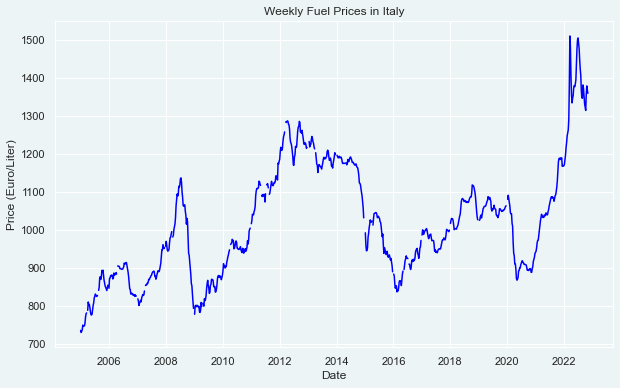

In [26]:
df['SURVEY_DATE'] = pd.to_datetime(df['SURVEY_DATE'])

# Group data by date and find the average price for each week
weekly_prices = df.groupby(pd.Grouper(key='SURVEY_DATE', freq='W-MON'))[['PRICE']].mean()

# Plot the line chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(weekly_prices.index, weekly_prices['PRICE'], color='blue')
ax.set_title('Weekly Fuel Prices in Italy')
ax.set_xlabel('Date')
ax.set_ylabel('Price (Euro/Liter)')
plt.show()

****Để trả lời câu hỏi này, chúng ta có thể sử dụng biểu đồ đường (line chart) để minh họa sự thay đổi giá nhiên liệu theo thời gian. Chúng ta sẽ xếp thời gian trên trục x và giá nhiên liệu trên trục y. Với biểu đồ này, ta có thể quan sát được xu hướng tăng hoặc giảm của giá nhiên liệu qua các thời điểm khác nhau. Đây là một biểu đồ rất hữu ích để đánh giá sự thay đổi của giá nhiên liệu theo thời gian.****

### Câu hỏi 6:  Phân phối giá nhiên liệu theo loại sản phẩm?


***Loại biểu đồ sử dụng:***  Biểu đồ violin là một dạng biểu đồ tương tự như box plot, cho phép chúng ta trực quan hóa phân phối dữ liệu và cũng cung cấp thông tin về mật độ xác suất của các giá trị dữ liệu.


****Để trả lời câu hỏi này, chúng ta có thể sử dụng biểu đồ violin (violin plot) để so sánh phân phối giá nhiên liệu giữa các loại sản phẩm khác nhau. Biểu đồ violin sẽ cho chúng ta thấy phân phối của dữ liệu ở mỗi loại sản phẩm dưới dạng một cái đàn violin.****

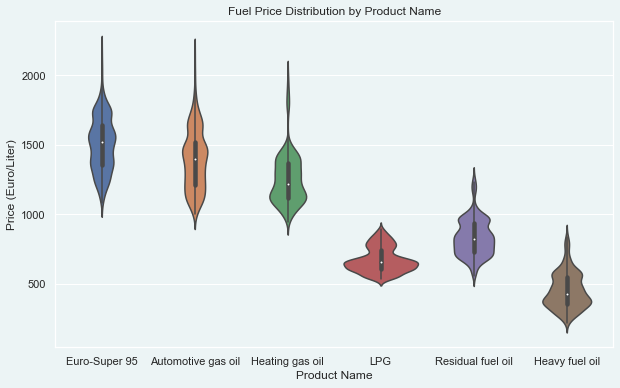

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(x='PRODUCT_NAME', y='PRICE', data=df, ax=ax)
ax.set_title('Fuel Price Distribution by Product Name')
ax.set_xlabel('Product Name')
ax.set_ylabel('Price (Euro/Liter)')
plt.show()

***Nhận xét:***  
 - Lý do chúng ta sử dụng biểu đồ violin trong trường hợp này là để hiển thị sự phân bố của giá nhiên liệu cho từng loại sản phẩm và so sánh sự khác biệt giữa các sản phẩm. Biểu đồ violin cho phép chúng ta hiển thị phân phối dữ liệu bằng cách vẽ các hình dạng violin đối xứng cho mỗi loại sản phẩm. Hình dạng của các violin được xây dựng dựa trên kernel density estimation (KDE) - một phương pháp ước tính hàm mật độ xác suất (PDF) dựa trên dữ liệu mẫu.

#### Câu hỏi 7: Sự tương quan giữa giá nhiên liệu và tỷ lệ VAT/Excise.


***Biểu đồ được chọn và lý do:*** 
 - Để trực quan hóa mối quan hệ giữa giá nhiên liệu và tỷ lệ VAT/Excise, chúng ta có thể sử dụng biểu đồ scatter plot với các điểm được mã màu theo một biến thứ ba - ở đây là loại sản phẩm. Biểu đồ này được gọi là bubble chart, cho phép chúng ta biểu diễn ba biến trên cùng một biểu đồ và thể hiện sự khác biệt giữa các loại sản phẩm.

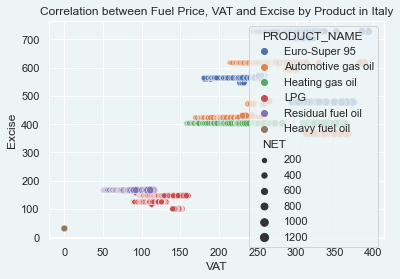

In [28]:
sns.scatterplot(x="VAT", y="EXCISE", size="NET", hue="PRODUCT_NAME", data=df)

# set axis labels and title
plt.xlabel("VAT")
plt.ylabel("Excise")
plt.title("Correlation between Fuel Price, VAT and Excise by Product in Italy")

# show plot
plt.show()

***Nhận xét:***
 - Lý do chúng ta sử dụng biểu đồ bubble chart trong trường hợp này là để hiển thị sự tương quan giữa giá nhiên liệu và tỷ lệ VAT/Excise cho từng loại sản phẩm và so sánh sự khác biệt giữa các sản phẩm. Biểu đồ bubble chart cho phép chúng ta biểu diễn hai biến số lên trục hoành và tung, còn biến thứ ba được mã màu và kích thước của hình tròn. Sự khác biệt giữa các loại sản phẩm sẽ được thể hiện bằng kích thước của hình tròn và màu sắc khác nhau.

#### Câu hỏi 8: Hãy áp dụng mô hình hồi quy tuyến tính cho giá xăng dầu trung bình ở Ý.

**Loại biểu đồ sử dụng:** Biểu đồ dot plot

**Tính phù hợp của biểu đồ với dữ liệu:** 

- Biểu đồ Dot Plot rất phù hợp để trực quan hóa các mô hình thuật toán máy học. Điều này bởi vì dot plot cho phép trực quan hóa các quan hệ tuyến tính giữa các biến, cho phép chúng ta dễ dàng nhận ra sự phụ thuộc tuyến tính giữa biến đầu vào và biến đầu ra. Khi biểu đồ được vẽ, ta có thể dễ dàng nhận thấy các giá trị outlier, các điểm dữ liệu bất thường, giúp ta xác định được những điểm cần xử lý hoặc loại bỏ khỏi dữ liệu để cải thiện kết quả mô hình.

- Ngoài ra, dot plot cũng giúp ta kiểm tra tính tuyến tính của quan hệ giữa biến đầu vào và biến đầu ra, tức là xác định xem liệu mối quan hệ có phải là một hàm tuyến tính hay không. Khi mô hình hồi quy tuyến tính được áp dụng, ta sẽ sử dụng đường thẳng hồi quy để mô tả mối quan hệ tuyến tính giữa biến đầu vào và biến đầu ra. Dot plot cho phép ta đánh giá độ phù hợp của mô hình hồi quy tuyến tính bằng cách so sánh các giá trị thực tế và dự đoán của biến đầu ra trên cùng một đồ thị, từ đó đánh giá được chất lượng của mô hình và đưa ra các cải tiến cho mô hình để tối ưu hóa dự đoán.

**Áp dụng mô hình và trực quan hóa:**

Trước hết, ta sẽ tiền xử lí dữ liệu bằng cách tính trung bình giá cả xăng dầu, lưu vào dataframe mới tên là avg_price.

Tiếp theo, ta chia dữ liệu thành 2 tập train và test, trong đó train/test là 0.9/0.1.

Để áp dụng Linear Regression, ta sẽ import LinearRegression từ sklearn. Sau đó thực hiện chạy  mô hình.

Lưu ý: Trong mô hình này, X có kiểu dữ liệu là datetime, mà kiểu dữ liệu này không đúng với tham số trong mô hình. Do đó ta cần chuyển kiểu dữ liệu về dạng ordinal như số nguyên để xử lý, sau khi xử lý xong thì ta sẽ vẽ biểu đồ, khi đó chuyển lại về dữ liệu datetime.

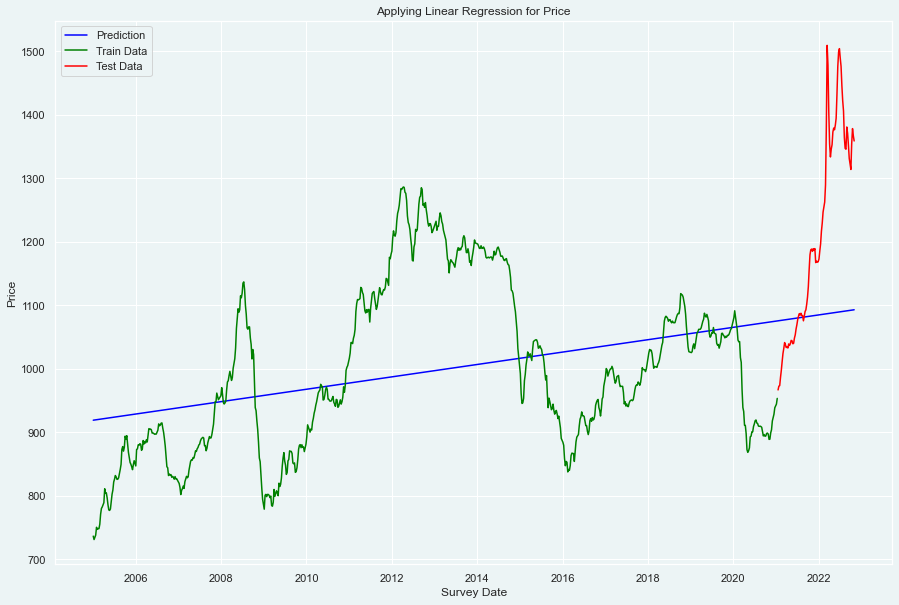

In [29]:
df['SURVEY_DATE'] = pd.to_datetime(df['SURVEY_DATE'])
avg_price = df.groupby(pd.Grouper(key='SURVEY_DATE', freq='W-MON'))[['PRICE']].mean().reset_index(drop = False)
# Lấy trung bình giá trị trước và sau của giá trị NaN trong cột PRICE
avg_price['PRICE'] = avg_price['PRICE'].fillna((avg_price['PRICE'].shift() + avg_price['PRICE'].shift(-1))/2)

# Làm mượt dữ liệu bằng hàm interpolate()
avg_price['PRICE'] = avg_price['PRICE'].interpolate()

# Chuyển đổi kiểu dữ liệu của X từ datetime64 sang ordinal
X = avg_price['SURVEY_DATE'].apply(lambda x: x.toordinal())
Y = avg_price['PRICE']
regressor = LinearRegression()
# Tách dữ liệu & Chạy mô hình
split_index = int(len(X)*0.9)
X_train, X_test, Y_train, Y_test = X[:split_index], X[split_index:], Y[:split_index], Y[split_index:]
regressor.fit(X_train.values.reshape(-1, 1), Y_train)

# Dự đoán
Y_train_pred = regressor.predict(X_train.values.reshape(-1, 1))
Y_test_pred = regressor.predict(X_test.values.reshape(-1, 1))

# Lấy giá trị năm
X_train_plot = avg_price['SURVEY_DATE'][:split_index]
X_test_plot = avg_price['SURVEY_DATE'][split_index:]

# Gộp lại để vẽ biểu đồ
Y_combined = np.concatenate((Y_train_pred, Y_test_pred))
X_combined = np.concatenate((X_train_plot, X_test_plot))

plt.figure(figsize=(15,10))

# Vẽ biểu đồ train
plt.plot(X_combined, Y_combined, color='blue')

# Vẽ biểu đồ giá trị thực tế
plt.plot(avg_price['SURVEY_DATE'][:split_index], Y[:split_index], color='green')
plt.plot(avg_price['SURVEY_DATE'][split_index:], Y[split_index:], color='red')

# Đặt tên cho trục x và y
plt.xlabel('Survey Date')
plt.ylabel('Price')

# Đặt tiêu đề cho biểu đồ
plt.title('Applying Linear Regression for Price')

# Đặt chú thích cho biểu đồ
plt.legend(['Prediction', 'Train Data', 'Test Data'])

# Hiển thị biểu đồ
plt.show()

Để đánh giá hiệu quả của một mô hình, ta sẽ dùng 2 tham số:

MAE (Mean Absolute Error) là giá trị trung bình của tổng chênh lệch tuyệt đối giữa giá trị dự đoán và giá trị thực tế trên toàn bộ tập dữ liệu. Nó thể hiện độ lỗi trung bình của mô hình.

MSE (Mean Squared Error) là giá trị trung bình của tổng bình phương chênh lệch giữa giá trị dự đoán và giá trị thực tế trên toàn bộ tập dữ liệu. Nó cũng thể hiện độ lỗi trung bình của mô hình.

In [30]:
# Tính các sai số trên tập train
mae_train = mean_absolute_error(Y_train, Y_train_pred)
mse_train = mean_squared_error(Y_train, Y_train_pred)

# Tính các sai số trên tập test
mae_test = mean_absolute_error(Y_test, Y_test_pred)
mse_test = mean_squared_error(Y_test, Y_test_pred)

print("Train - MAE: {}, MSE: {}".format(mae_train, mse_train))
print("Test - MAE: {}, MSE: {}".format(mae_test, mse_test))

Train - MAE: 100.15354727176225, MSE: 15046.991689083841
Test - MAE: 153.56373632849738, MSE: 39853.478263143166


**Giải thích:**

Dựa vào các giá trị MAE (Mean Absolute Error), MSE (Mean Squared Error), ta có thể đưa ra một số nhận xét về mô hình Linear Regression như sau:

Trên tập huấn luyện (Train), giá trị MAE là 100.15, MSE là 15046.99. Giá trị MAE và MSE cũng không thấp, cho thấy mô hình không dự đoán chính xác giá trị.

Trên tập kiểm tra (Test), giá trị MAE là 153.56, MSE là 39853.48. Giá trị MAE và MSE cao, cho thấy mô hình không dự đoán chính xác giá trị trên tập kiểm tra.

**Nhận xét chung:** Như vậy, đối với dữ liệu trong bài tập này, áp dụng mô hình hồi quy tuyến tính là không phù hợp.

#### Câu hỏi 9: Hãy áp dụng các mô hình dự đoán khác cho giá xăng dầu trung bình ở Ý.

Chúng em sẽ áp dụng một số mô hình dự báo cho chuỗi thời gian để dự báo giá xăng dầu trung bình ở Italia.

Trước hết, cần phải chia dữ liệu thành tập Train và Test, trong đó Train/Test là 0.9/0.1. Sau đó trực quan hóa bằng Matplotlib.

Số dòng của tập train: 837
Số dòng của tập test: 94


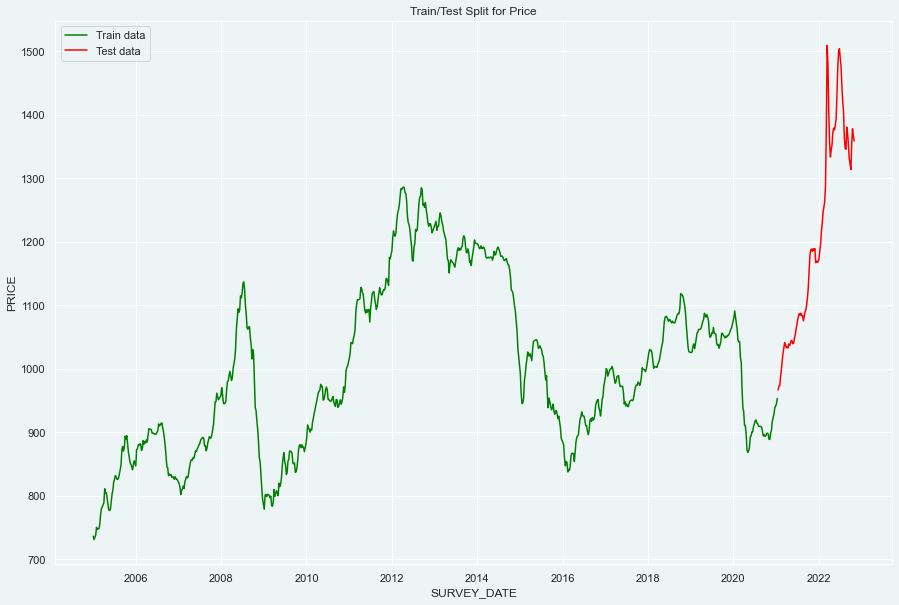

In [31]:
df['SURVEY_DATE'] = pd.to_datetime(df['SURVEY_DATE'])
avg_price = df.groupby(pd.Grouper(key='SURVEY_DATE', freq='W-MON'))[['PRICE']].mean()
# Lấy trung bình giá trị trước và sau của giá trị NaN trong cột PRICE
avg_price['PRICE'] = avg_price['PRICE'].fillna((avg_price['PRICE'].shift() + avg_price['PRICE'].shift(-1))/2)

# Làm mượt dữ liệu bằng hàm interpolate()
avg_price['PRICE'] = avg_price['PRICE'].interpolate()

# Chia dataframe thành tập train và tập test
train, test = train_test_split(avg_price, test_size=0.1, shuffle=False)
train = train.sort_index()
test = test.sort_index()

print("Số dòng của tập train:", len(train))
print("Số dòng của tập test:", len(test))

# Vẽ đồ thị
plt.figure(figsize=(15,10))
plt.plot(train, color='green', label='Train data')
plt.plot(test, color='red', label='Test data')
plt.title("Train/Test Split for Price")
plt.xlabel('SURVEY_DATE')
plt.ylabel('PRICE')
plt.legend()
plt.show()

**Mô hình ARIMA (Autoregressive Integrated Moving Average)**:

ARIMA (Autoregressive Integrated Moving Average) là một mô hình dự báo chuỗi thời gian phổ biến được sử dụng trong lĩnh vực kinh tế học, tài chính và nhiều lĩnh vực khác. ARIMA kết hợp giữa mô hình AR (Autoregressive) và mô hình MA (Moving Average) để mô hình hóa các quan hệ phụ thuộc giữa các giá trị liên tiếp trong chuỗi thời gian. Nó cũng bao gồm một bước khử sai số (differencing) để biến đổi chuỗi thời gian phi tuyến thành chuỗi thời gian tuyến tính có thể được mô hình hóa bằng AR và MA. Mô hình ARIMA có thể được sử dụng để dự báo giá trị tương lai của chuỗi thời gian dựa trên các giá trị quá khứ.

Ta sẽ áp dụng thử mô hình này. Để đơn giản, ta sẽ sử dụng thư viện có sẵn trong Python và sau đó trực quan bằng Matplotlib.

Trong mô hình này, có các tham số gồm 3 giá trị là (p, d, q). 
Với: 
- p là bậc tự hồi quy
- d là bậc sai phân (độ lệch)
- q là bậc trung bình trượt


c:\Users\ACER\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA (p, d, q) = ( 5 , 2 , 3 )
MSE:  78442.12456312642
MAE:  235.83818288948547


c:\Users\ACER\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA (p, d, q) = ( 1 , 3 , 2 )
MSE:  105447.38576517122
MAE:  275.9861946857401


c:\Users\ACER\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA (p, d, q) = ( 2 , 3 , 5 )
MSE:  4660.711656279267
MAE:  44.72738667638615


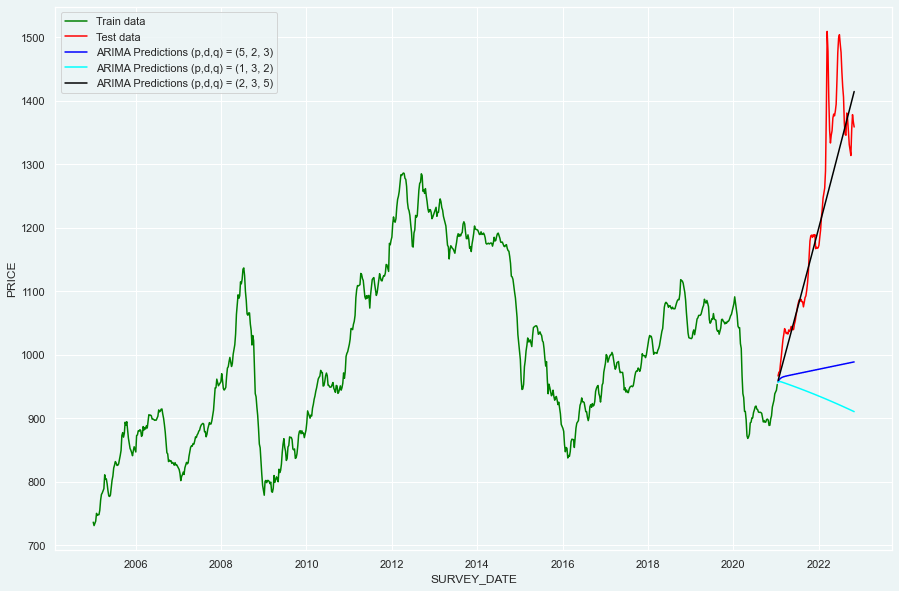

In [32]:
y = train['PRICE']

# Hàm ARIMA_Function: truyền vào các tham số (p, d, q), sau đó chạy và trả về kết quả dự đoán
def ARIMA_Function(p, d, q):
    ARIMAmodel = ARIMA(y, order = (p,d,q))
    ARIMAmodel = ARIMAmodel.fit()
    arima_y_pred = ARIMAmodel.get_forecast(len(test.index))
    arima_y_pred_df = arima_y_pred.conf_int(alpha = 0.05) 
    arima_y_pred_df["Predictions"] = ARIMAmodel.predict(start = arima_y_pred_df.index[0], end = arima_y_pred_df.index[-1])
    arima_y_pred_df.index = test.index
    arima_y_pred_out = arima_y_pred_df["Predictions"] 
    # Tính toán MSE và MAE giữa dữ liệu thực tế và dự đoán
    mse = mean_squared_error(test, arima_y_pred_out)
    mae = mean_absolute_error(test, arima_y_pred_out)

    # In ra kết quả
    print("ARIMA (p, d, q) = (",p,",",d,",",q,")")
    print("MSE: ", mse)
    print("MAE: ", mae)
    return arima_y_pred_out

# Vẽ lại biểu đồ cũ
plt.figure(figsize=(15,10))
plt.plot(train, color='green', label='Train data')
plt.plot(test, color='red', label='Test data')
plt.xlabel('SURVEY_DATE')
plt.ylabel('PRICE')
plt.legend()

# Test 1:
arima_y_pred_out = ARIMA_Function(5, 2, 3)
plt.plot(arima_y_pred_out, color='blue', label = 'ARIMA Predictions (p,d,q) = (5, 2, 3)')

# Test 2:
arima_y_pred_out = ARIMA_Function(1, 3, 2)
plt.plot(arima_y_pred_out, color='cyan', label = 'ARIMA Predictions (p,d,q) = (1, 3, 2)')

# Test 3:
arima_y_pred_out = ARIMA_Function(2, 3, 5)
plt.plot(arima_y_pred_out, color='black', label = 'ARIMA Predictions (p,d,q) = (2, 3, 5)')

plt.legend()

plt.show()

(Có một số warning hiện lên do quá trình tối ưu hóa không thể đạt được điều kiện dừng sau một số lượng lớn các vòng lặp. Điều này có thể xảy ra khi mô hình quá phức tạp hoặc dữ liệu quá nhiễu. Lỗi này có thể được giải quyết bằng cách giảm độ phức tạp của mô hình, tăng số lần vòng lặp hoặc sử dụng các phương pháp tối ưu hóa khác. Hiện tại chúng em vẫn tạm thời chấp nhận kết quả này)

Như vậy có thể thấy, mô hình ARIMA này cho kết quả tốt hơn so với hồi quy tuyến tính trong bài toán chuỗi thời gian.
Ngoài ra, ta cũng thấy với mỗi bộ tham số (p, d, q) khác nhau, mô hình sẽ cho kết quả dự đoán khác nhau. Ví dụ trong bài toán trên thì (2, 3, 5) sẽ cho kết quả có độ chính xác cao nhất.

Mô hình ARIMA là một trong những mô hình phổ biến được sử dụng để dự đoán chuỗi thời gian. Nó là một kết hợp giữa mô hình AR và mô hình MA, và có thể được sử dụng để mô hình hoá những dạng chuỗi thời gian không tĩnh và có tính khả dụng cao. Tuy nhiên, để đạt được kết quả tốt, cần phải lựa chọn kỹ các tham số p, d, q phù hợp cho mô hình. Ngoài ra, khi huấn luyện mô hình, cần phải quan sát và giám sát quá trình tối ưu hóa để tránh các vấn đề như overfitting hoặc không hội tụ.

#### Câu hỏi 10: Hãy áp dụng Classification model để phân loại các loại xăng ở Ý.

Phân chia dữ liệu thành 2 set: training set (75%) và testing set (25%)

In [13]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df[['PRICE', 'VAT', 'EXCISE', 'NET', 'CHANGE']], 
    df['PRODUCT_NAME'], 
    test_size=0.25, 
    random_state=42
)

Scale dữ liệu sử dụng **StandardScaler**

In [14]:
# scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Sử dụng 2 classification model: `Random Forest Classifier`, `Decision Tree Classifier` để phân loại loại xăng dầu

**1. Random Forest Classifier**

In [15]:
# create a Random Forest model
rf = RandomForestClassifier()

# train the model
rf.fit(X_train, y_train)


So sánh 10 giá trị đầu tiên giữa kết quả thực tế (y_test) và kết quả dự đoán (y_pred)

In [20]:
y_pred = rf.predict(X_test)
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": y_pred})
data.head(10)

,Y_test,Y_pred
4003,Automotive gas oil,Automotive gas oil
1729,Automotive gas oil,Automotive gas oil
401,Heavy fuel oil,Heavy fuel oil
1242,Euro-Super 95,Euro-Super 95
3406,Residual fuel oil,Residual fuel oil
33,LPG,LPG
290,Heating gas oil,Heating gas oil
4645,Automotive gas oil,Automotive gas oil
2417,Heavy fuel oil,Heavy fuel oil
4824,Euro-Super 95,Euro-Super 95


**1. Decision Tree Classifier**

In [18]:
dt = DecisionTreeClassifier()

# train the model
dt.fit(X_train, y_train)

So sánh 10 giá trị đầu tiên giữa kết quả thực tế (y_test) và kết quả dự đoán (y_pred)

In [21]:
y_pred = dt.predict(X_test)
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": y_pred})
data.head(10)

,Y_test,Y_pred
4003,Automotive gas oil,Automotive gas oil
1729,Automotive gas oil,Automotive gas oil
401,Heavy fuel oil,Heavy fuel oil
1242,Euro-Super 95,Euro-Super 95
3406,Residual fuel oil,Residual fuel oil
33,LPG,LPG
290,Heating gas oil,Heating gas oil
4645,Automotive gas oil,Automotive gas oil
2417,Heavy fuel oil,Heavy fuel oil
4824,Euro-Super 95,Euro-Super 95


**Đánh giá mô hình**

Kiểm tra các chỉ số độ chính xác (accuracy) của từng model

In [22]:
y_pred_rf = rf.predict(X_test)
score_rf = accuracy_score(y_test, y_pred_rf)

y_pred_dt = dt.predict(X_test)
score_dt = accuracy_score(y_test, y_pred_dt)

print('Random Forest Classifier: ' + str(score_rf))
print('Decision Tree Classifier: ' + str(score_dt))

Random Forest Classifier: 0.9990671641791045
Decision Tree Classifier: 0.9990671641791045


Báo cáo phân loại của các model (bao gồm accurancy, precision, recall, f-1 score)

In [25]:
print('Random Forest Classifier\n' + classification_report(y_test, y_pred_rf))

Random Forest Classifier
                    precision    recall  f1-score   support

Automotive gas oil       0.99      1.00      1.00       187
     Euro-Super 95       1.00      0.99      1.00       167
   Heating gas oil       1.00      1.00      1.00       177
    Heavy fuel oil       1.00      1.00      1.00       190
               LPG       1.00      1.00      1.00       179
 Residual fuel oil       1.00      1.00      1.00       172

          accuracy                           1.00      1072
         macro avg       1.00      1.00      1.00      1072
      weighted avg       1.00      1.00      1.00      1072



In [26]:
print('Decision Tree Classifier\n' + classification_report(y_test, y_pred_dt))

Decision Tree Classifier
                    precision    recall  f1-score   support

Automotive gas oil       1.00      0.99      1.00       187
     Euro-Super 95       0.99      1.00      1.00       167
   Heating gas oil       1.00      1.00      1.00       177
    Heavy fuel oil       1.00      1.00      1.00       190
               LPG       1.00      1.00      1.00       179
 Residual fuel oil       1.00      1.00      1.00       172

          accuracy                           1.00      1072
         macro avg       1.00      1.00      1.00      1072
      weighted avg       1.00      1.00      1.00      1072



**Nhận xét:** Dựa vào các thông số đánh giá mô hình ở trên, ta thấy có thể áp dụng cả Random Forest Classifier và Decision Tree Classifier để có thể phân loại xăng ở Ý.

## Tài liệu tham khảo: 

https://www.kaggle.com/code/atrisaxena/animated-way-of-visualization-ipyvizzu

https://www.kaggle.com/code/bhuvanchennoju/data-science-salaries-plotly-tableau

https://builtin.com/data-science/time-series-forecasting-python

http://phuongphapnghiencuu.com/cac-mo-hinh-ar-ma-va-arima/